<a href="https://colab.research.google.com/github/Cill19/Breast-Cancer-Wisconsin-Classification-with-Decision-tree/blob/main/Breast_Cancer_Wisconsin_Classification_with_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tahap 1: Mengumpulkan data

In [12]:
# Instalasi ucimlrepo jika belum terinstal
!pip install ucimlrepo

# Mengimpor library yang diperlukan
from ucimlrepo import fetch_ucirepo

# Mengambil dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Menampilkan metadata dataset untuk mengetahui informasi dasar
print("Dataset Metadata:")
print(breast_cancer_wisconsin_original.metadata)


Dataset Metadata:
{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, havin

Dataset **Breast Cancer Wisconsin (Original)** adalah dataset yang digunakan untuk klasifikasi biner, bertujuan untuk memprediksi apakah tumor bersifat **benign** (jinak) atau **malignant** (ganas) berdasarkan 9 fitur numerik, seperti ketebalan klum, ukuran sel, dan bentuk sel. Dataset ini terdiri dari 699 entri dan target klasifikasinya berada pada kolom `Class`, dengan nilai 2 untuk benign dan 4 untuk malignant. Decision Tree sangat cocok untuk digunakan pada dataset ini, karena dapat menangani data numerik dan memberikan interpretasi visual tentang bagaimana keputusan dibuat berdasarkan fitur-fitur tersebut. Fitur dengan nilai hilang, seperti `Bare_nuclei`, perlu ditangani terlebih dahulu menggunakan imputasi sebelum melatih model.

Tahap 2: Menelaah data

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengunduh dataset langsung dari URL UCI
url = "https://archive.ics.uci.edu/static/public/15/data.csv"
data = pd.read_csv(url)

# 1. Melihat preview data (5 baris pertama)
print("Data Preview:")
print(data.head())





Data Preview:
   Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0          1.0                3          

In [21]:
# 2. Memeriksa informasi umum tentang data (jumlah baris, kolom, tipe data)
print("\nData Info:")
print(data.info())

# 3. Menampilkan statistik deskriptif untuk fitur numerik
print("\nDescriptive Statistics:")
print(data.describe())





Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB
None

Descriptive Statistics:
       Sample_code_number  Clump_thickness  Uni

In [22]:
# 4. Memeriksa apakah ada nilai yang hilang
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


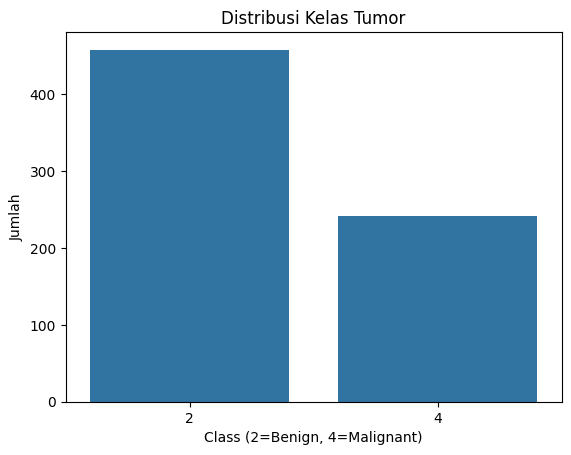

In [23]:

# 5. Visualisasi distribusi target (Class: benign vs malignant)
sns.countplot(x='Class', data=data)
plt.title('Distribusi Kelas Tumor')
plt.xlabel('Class (2=Benign, 4=Malignant)')
plt.ylabel('Jumlah')
plt.show()


Correlation Matrix:


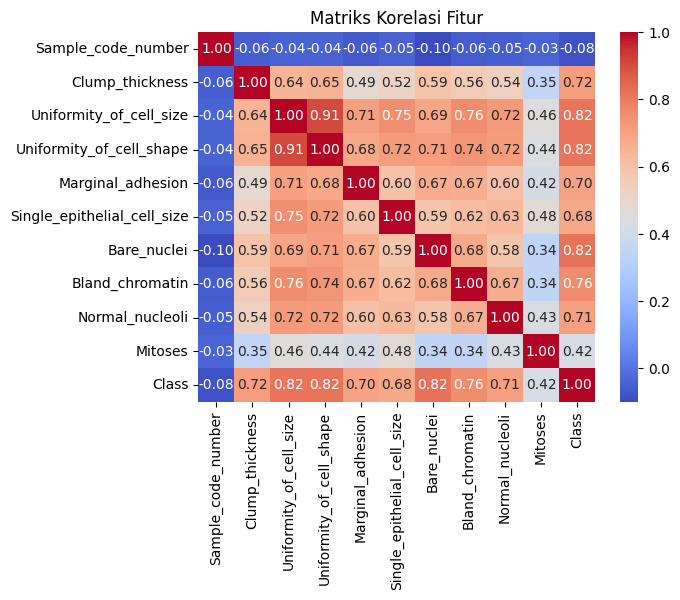

In [24]:
# 6. Memeriksa korelasi antar fitur
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

In [25]:
# 7. Membersihkan nama kolom (jika ada spasi atau karakter aneh)
data.columns = data.columns.str.strip().str.replace(' ', '_')

In [26]:
# 8. Memisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)  # Semua kolom kecuali 'Class'
y = data['Class']  # Kolom target 'Class'

In [27]:
# 9. Cek kembali preview data setelah pemisahan
print("\nFitur X Preview:")
print(X.head())


Fitur X Preview:
   Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  
0          1.0                3             

In [28]:
print("\nTarget y Preview:")
print(y.head())


Target y Preview:
0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


In [29]:
# 10. Menampilkan distribusi kelas target
print("\nDistribusi Kelas Target:")
print(y.value_counts())


Distribusi Kelas Target:
Class
2    458
4    241
Name: count, dtype: int64


Memeriksa adanya outlier atau tidak

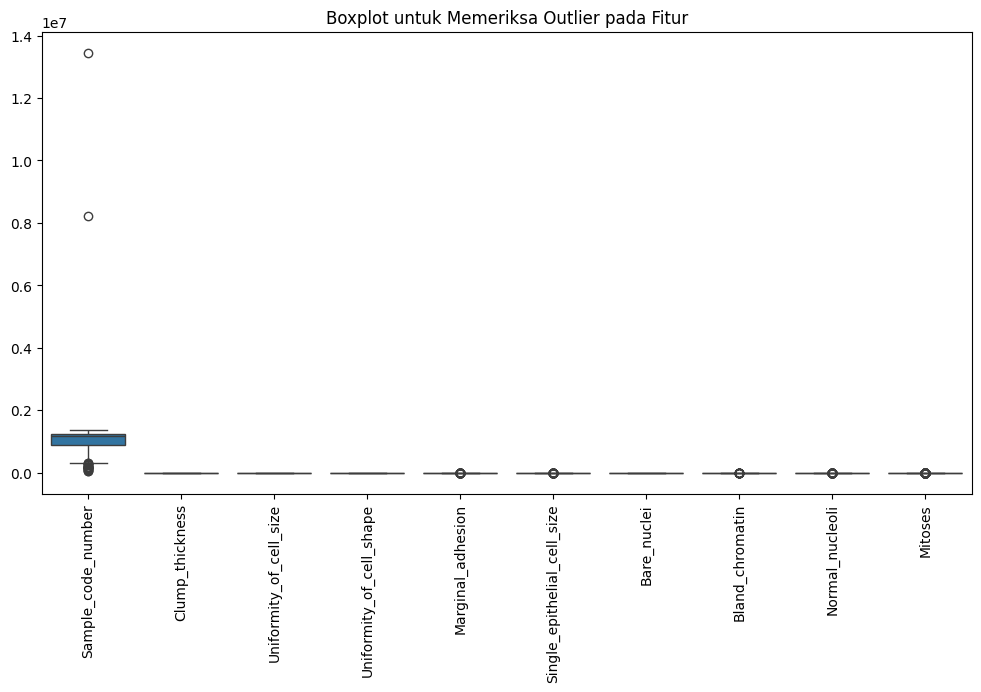


Jumlah Outlier per Fitur (berdasarkan IQR):
Sample_code_number              23
Clump_thickness                  0
Uniformity_of_cell_size          0
Uniformity_of_cell_shape         0
Marginal_adhesion               60
Single_epithelial_cell_size     54
Bare_nuclei                      0
Bland_chromatin                 20
Normal_nucleoli                 77
Mitoses                        120
dtype: int64

Jumlah Outlier per Fitur (berdasarkan Z-score):
Sample_code_number              2
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size    31
Bare_nuclei                     0
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                        31
dtype: int64


In [30]:
import numpy as np

# 1. Visualisasi Boxplot untuk Memeriksa Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)  # X adalah fitur-fitur dalam dataset
plt.title('Boxplot untuk Memeriksa Outlier pada Fitur')
plt.xticks(rotation=90)
plt.show()

# 2. Menggunakan IQR (Interquartile Range) untuk mendeteksi outlier

# Menentukan Q1 (25th percentile) dan Q3 (75th percentile)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Memeriksa outlier
outliers = ((X < lower_bound) | (X > upper_bound)).sum()
print("\nJumlah Outlier per Fitur (berdasarkan IQR):")
print(outliers)

# 3. Menggunakan Z-score untuk mendeteksi outlier (opsional)
from scipy.stats import zscore

# Menghitung Z-score untuk setiap fitur
z_scores = np.abs(zscore(X))

# Menentukan batas Z-score untuk outlier (misalnya Z > 3 dianggap sebagai outlier)
outliers_zscore = (z_scores > 3).sum(axis=0)
print("\nJumlah Outlier per Fitur (berdasarkan Z-score):")
print(outliers_zscore)


membuat fungsi untuk menangani outlier

In [32]:
# Menangani outlier berdasarkan IQR
for column in X.columns:
    # Menghitung Q1 dan Q3
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan median
    X[column] = X[column].apply(lambda x: X[column].median() if x < lower_bound or x > upper_bound else x)


In [33]:
# Mengecek outlier setelah penanganan dengan IQR
outliers_after_iqr = {}

for column in X.columns:
    # Menghitung Q1 dan Q3 setelah penanganan
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier di setiap kolom
    outliers_after_iqr[column] = ((X[column] < lower_bound) | (X[column] > upper_bound)).sum()

# Menampilkan jumlah outlier setelah penanganan dengan IQR
print("Jumlah Outlier per Fitur (setelah penanganan IQR):")
print(outliers_after_iqr)


Jumlah Outlier per Fitur (setelah penanganan IQR):
{'Sample_code_number': 87, 'Clump_thickness': 0, 'Uniformity_of_cell_size': 0, 'Uniformity_of_cell_shape': 0, 'Marginal_adhesion': 116, 'Single_epithelial_cell_size': 167, 'Bare_nuclei': 0, 'Bland_chromatin': 117, 'Normal_nucleoli': 80, 'Mitoses': 0}


Tahap 4: Menentukan Object data

In [35]:


# Cek apakah data features dan targets ada
features = breast_cancer_wisconsin_original.data.features
targets = breast_cancer_wisconsin_original.data.targets

# Convert ke dataframe untuk mempermudah pengelolaan
X = pd.DataFrame(features)
y = pd.DataFrame(targets)

# Menampilkan beberapa baris pertama dari X dan y untuk memastikan pemisahan data sudah benar
print("Fitur (X) - Beberapa Baris Pertama:")
print(X.head())

print("\nTarget (y) - Beberapa Baris Pertama:")
print(y.head())


Fitur (X) - Beberapa Baris Pertama:
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                

Tahap 5: Membersihkan data

In [36]:
# 1. Menangani nilai yang hilang
# Ganti nilai yang hilang pada Bare_nuclei dengan median
data['Bare_nuclei'] = data['Bare_nuclei'].fillna(data['Bare_nuclei'].median())

# 2. Mengubah tipe data kolom 'Class' menjadi integer
data['Class'] = data['Class'].astype(int)

# 3. Menghapus kolom 'Sample_code_number' karena tidak relevan untuk model
data = data.drop(columns=['Sample_code_number'])

# 4. Memeriksa apakah ada duplikasi
print("\nJumlah Duplikasi dalam Data:")
print(data.duplicated().sum())

# Menghapus baris duplikat jika ada
data = data.drop_duplicates()

# 5. (Opsional) Melakukan Skalasi Data untuk fitur numerik
from sklearn.preprocessing import StandardScaler

# Menentukan fitur yang akan diskalakan
X = data.drop('Class', axis=1)  # Fitur
y = data['Class']  # Target

# Menstandarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengonversi kembali hasil skala ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Menampilkan hasil
print("\nData setelah pembersihan dan skalasi:")
print(X_scaled.head())



Jumlah Duplikasi dalam Data:
242

Data setelah pembersihan dan skalasi:
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0        -0.128603                -0.993808                 -1.050717   
1        -0.128603                -0.066930                 -0.089079   
2        -0.828263                -0.993808                 -1.050717   
3         0.221227                 1.168907                  1.193104   
4        -0.478433                -0.993808                 -1.050717   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0          -0.864384                    -0.763716    -0.965209   
1           0.403749                     1.279716     1.357731   
2          -0.864384                    -0.763716    -0.707105   
3          -0.864384                    -0.355030    -0.190896   
4          -0.230317                    -0.763716    -0.965209   

   Bland_chromatin  Normal_nucleoli   Mitoses  
0        -0.453018        -0.838199 -0.4372

Tahap 6: Mengkonstruksi data

memisakhan fitur dan label

In [41]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns='Class')  # Fitur
y = data['Class']  # Target


In [42]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")


Training data size: 559
Test data size: 140


In [46]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop(columns='Class')  # Fitur
Y = data['Class']  # Target

# Membagi data menjadi data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model DecisionTreeClassifier dengan parameter tertentu
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model menggunakan data pelatihan
model.fit(X_train, Y_train)
import sklearn.metrics

# Membuat prediksi terhadap data testing
predictions = model.predict(X_test)

# Membuat confusion matrix untuk mengevaluasi hasil
confusion_array = sklearn.metrics.confusion_matrix(Y_test, predictions)

# Menampilkan confusion matrix
print(confusion_array)


[[89  6]
 [ 4 41]]


In [47]:
# Menghitung dan menampilkan akurasi
accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print(f"Akurasi Model: {accuracy}")

# Menampilkan classification report untuk metrik tambahan seperti precision, recall, dan f1-score
print(sklearn.metrics.classification_report(Y_test, predictions))


Akurasi Model: 0.9285714285714286
              precision    recall  f1-score   support

           2       0.96      0.94      0.95        95
           4       0.87      0.91      0.89        45

    accuracy                           0.93       140
   macro avg       0.91      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140



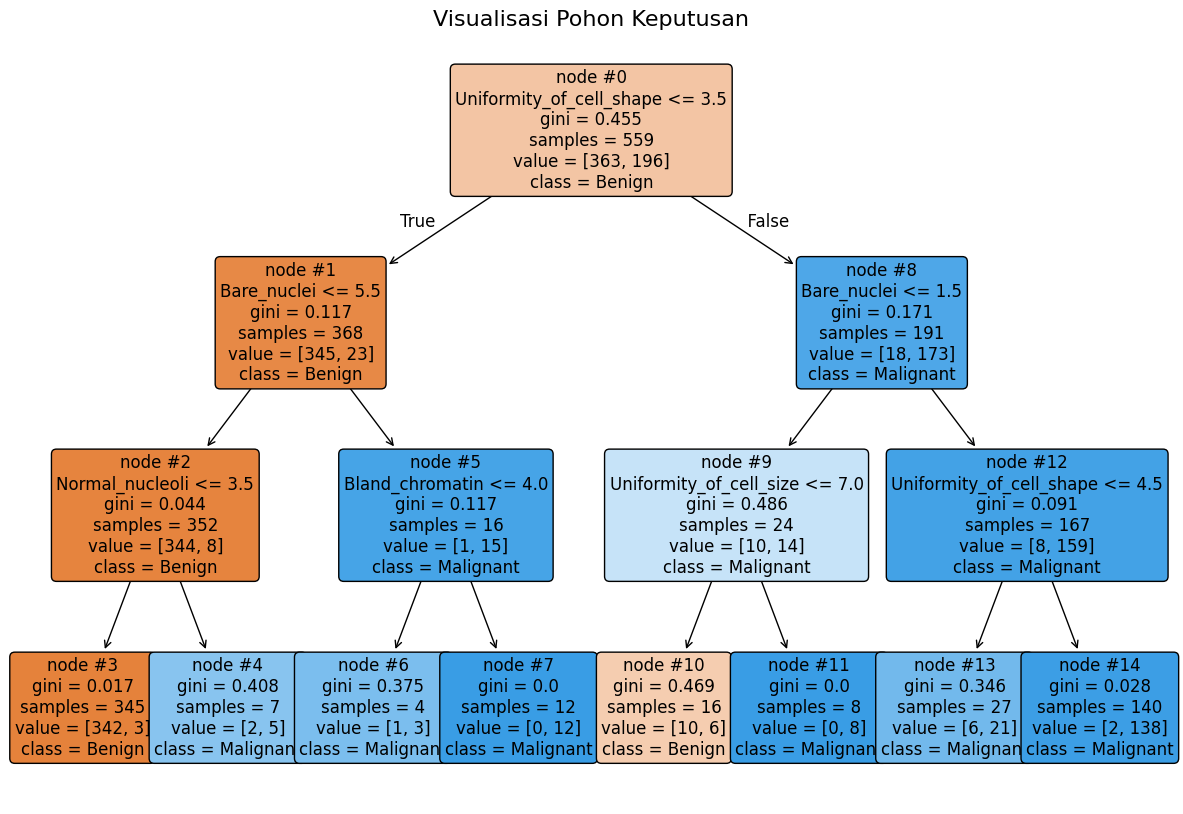

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan dengan pengaturan tambahan agar lebih jelas
plt.figure(figsize=(15, 10))  # Ukuran gambar lebih besar
plot_tree(
    model,
    filled=True,  # Warnai setiap node untuk memudahkan pemahaman
    feature_names=X.columns,  # Menampilkan nama fitur di setiap node
    class_names=['Benign', 'Malignant'],  # Menampilkan nama kelas (target)
    rounded=True,  # Membuat tampilan node lebih halus (rounded corners)
    fontsize=12,  # Ukuran font yang lebih besar
    node_ids=True,  # Menampilkan ID untuk setiap node
    proportion=False,  # Menampilkan proporsi lebih jelas
    label='all'  # Menampilkan label untuk semua node
)
plt.title("Visualisasi Pohon Keputusan", fontsize=16)  # Menambahkan judul yang lebih jelas
plt.show()
